In [4]:


import os
import numpy as np
from PIL import Image

def save_npy(images_folder):

    # List to store image data
    image_data = []

    # Iterate over the images in the directory
    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
            # Load image and convert to grayscale if necessary
            image = Image.open(os.path.join(images_folder, filename))
            # Convert image to numpy array and append to the list
            image_data.append(np.array(image))

    # Convert the list of numpy arrays to a single numpy array
    image_data = np.array(image_data)

    # Save the numpy array to .npy file
    np.save( images_folder + ".npy", image_data)

for i in range(10):
    save_npy("D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_mnist\\data\\test\\" + str(i))

# for i in range(10):
#     image_data = np.load("D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_mnist\\data\\train\\" + str(i)  + ".npy")
#     print(image_data.shape)


In [7]:
import os
import numpy as np

x_train = []
y_train = []

x_test = []
y_test = []

for i in range(10):
    image_data = np.load("D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_mnist\\data\\train\\" + str(i)  + ".npy")
    print(image_data.shape)
    
    # Add image data to x_train
    x_train.extend(image_data)
    
    # Create labels for the current class
    labels = [i] * len(image_data)
    
    # Add labels to y_train
    y_train.extend(labels)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


for i in range(10):
    image_data = np.load("D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_mnist\\data\\test\\" + str(i)  + ".npy")
    print(image_data.shape)
    
    # Add image data to x_train
    x_test.extend(image_data)
    
    # Create labels for the current class
    labels = [i] * len(image_data)
    
    # Add labels to y_train
    y_test.extend(labels)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
(980, 28, 28)
(1135, 28, 28)
(1032, 28, 28)
(1010, 28, 28)
(982, 28, 28)
(892, 28, 28)
(958, 28, 28)
(1028, 28, 28)
(974, 28, 28)
(1009, 28, 28)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [39]:
## show statistics

def show_statiscs(y_temp , categories):
    
    scores = []

    for c in categories:
        scores.append(0)
    
    for y in y_temp:
        scores[y] = scores[y] + 1

    for idx in range(len(categories)):
        print(categories[idx] + ": " + str(scores[idx]))

show_statiscs(y_train , ["cat", "dog"])

cat: 7500
dog: 7500


In [12]:
## build model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Print model summary
model.summary()


c:\Users\MAHMOUD TAHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# pip install pydot graphviz
# pip install graphviz

from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [13]:
# normal trainig of the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5673 - loss: 1.6634
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.5323
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.3970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9017 - loss: 0.3471
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9092 - loss: 0.3150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.2979
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9204 - loss: 0.2783
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9245 - loss: 0.2687
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9238 - loss: 0.2639
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.2573


dict_keys(['accuracy', 'loss'])


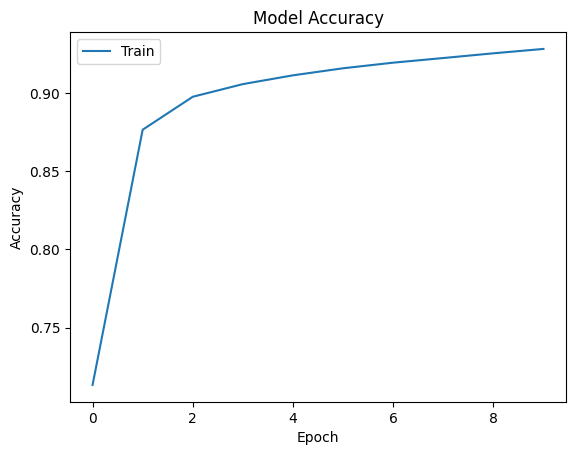

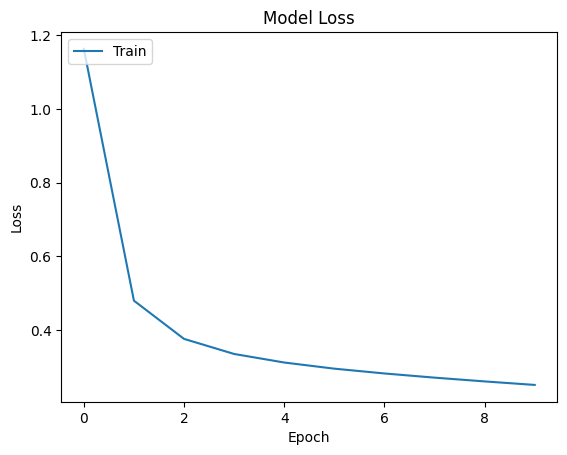

In [14]:
## show trainig history details 

# Access the training history
print(history.history.keys())

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
## Evaluate model

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# loss and accuracy
loss, accuracy = model.evaluate(np.array(x_test), np.array(y_test))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Calculate precision and recall
y_pred = model.predict(np.array(x_test))
y_pred = (y_pred > 0.5).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.1890
Test Loss: 0.2453410029411316, Test Accuracy: 0.9286999702453613
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
## save the model with timestamp namd

import os
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Get the current working directory of the notebook
cwd = os.getcwd()

# Define the model name with the timestamp
model_name = f"model_{timestamp}.h5"

# Save the model
model.save(os.path.join(cwd, model_name))

# Print confirmation message
print("Model saved at:", os.path.join(cwd, model_name))


Model saved at: d:\Artificial Intelligence\Machine Learning\_projects\nn_mnist\_notebook\model_20240410_235851.h5
